In [1]:
import pandas as pd 
import os
os.chdir('/home/spankaew/Git/BooleanBenchmark')
import logic_ensemble as le

/home/spankaew/anaconda3/envs/network_analysis/lib/python3.10/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


# Load model path into logic_ensemble object

In [2]:
model_path = '/home/spankaew/Git/BooleanBenchmark/models/herault_hematopoiesis/'
model = le.LogicEnsemble(model_path, project_name = 'herault_hematopoiesis')
model.create_simulation()

Simulation object created


In [3]:
traj_dir = '/home/spankaew/Git/BooleanBenchmark/models/herault_hematopoiesis' 
traj_data = pd.read_csv('/home/spankaew/Git/BooleanBenchmark/models/herault_hematopoiesis_traj_df.csv', index_col= 0)
initial_state = traj_data.loc['iHSC']
initial_state = initial_state.dropna().to_dict()

From `logic_ensemble` object -> you can define simulation parameters and initial condition of the simulation directly. The simulation gives the node activity at each simulation time that is stored in the object called `.simulation.simulation_df`

In [4]:
model.simulation.update_parameters(max_time = 30,thread_count = 15)
model.simulation.run_simulation(initial_state=initial_state)

Start simulation


100%|██████████| 617/617 [00:51<00:00, 11.88it/s]

Simulation completed


In [5]:
model.simulation.simulation_df

,Myc,Bclaf1,CDK46CycD,Junb,CIPKIP,Gata2,Ikzf1,Spi1,Cebpa,Egr1,Gata1,Klf1,Fli1,Zfpm1,Tal1,model_id,timepoint
0,0.040417,0.651424,0.010673,0.010467,0.001093,0.800852,0.302580,0.003331,0.232735,0.001790,0.337004,0.010196,0.709835,0.393404,0.724621,bn168,0.0
1,0.094250,0.279505,0.052074,0.052907,0.024776,0.480843,0.485408,0.011846,0.259254,0.011778,0.681287,0.077764,0.596776,0.502486,0.626931,bn168,1.0
2,0.077288,0.156572,0.073199,0.071505,0.051538,0.250538,0.396216,0.015818,0.141901,0.020041,0.786791,0.124995,0.645338,0.655213,0.702755,bn168,2.0
3,0.051407,0.090150,0.063876,0.068908,0.067961,0.129299,0.261377,0.018000,0.065435,0.020398,0.816123,0.141231,0.684795,0.756842,0.760141,bn168,3.0
4,0.029171,0.055832,0.045878,0.054218,0.067250,0.065659,0.163100,0.018069,0.031615,0.016159,0.816348,0.138065,0.698630,0.795091,0.799510,bn168,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003000,0.003000,0.000000,0.893000,0.131000,0.762000,0.893000,0.893000,bn504,24.0
17889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003000,0.003000,0.000000,0.893000,0.131000,0.762000,0.893000,0.893000,bn504,25.0
17890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003000,0.003000,0.000000,0.893000,0.131000,0.762000,0.893000,0.893000,bn504,26.0
17891,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003000,0.003000,0.000000,0.893000,0.131000,0.762000,0.893000,0.893000,bn504,27.0


# Create simulation trajectory from the simulation
When we perform the simulation, the result of the timestep node activity can be visualized using dimension reduction method such as `pca`.

Trajectory object created


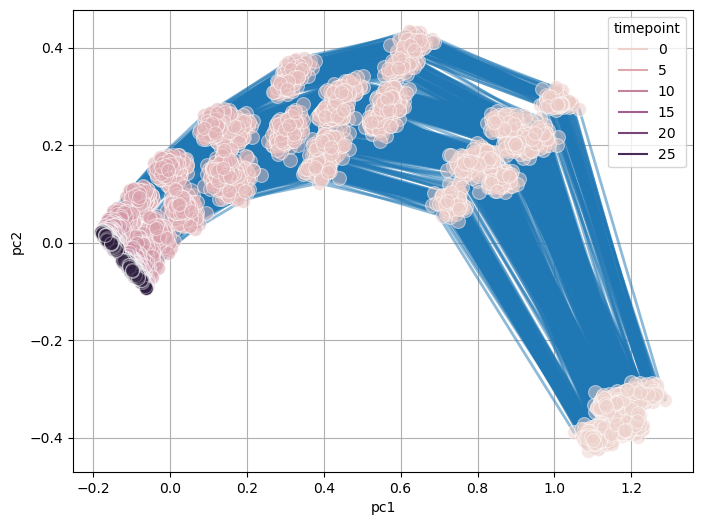

In [6]:
model.create_trajectory()
model.trajectory.pca_trajectory()
model.trajectory.plot_trajectory(color = 'timepoint', show_legend=True)

From the visualization, we can then try to group together models with simular simulation activity via clustering. 

In `logic_ensemble`, we utilize the package called `tslearn` - a toolkit to perform analysis on time series data. 

The timeseries clustering method included in this toolkit includes : 

- euclidean (default)

- dynamic time warping (dtw) 

- softdtw.

The calculated clustering will be embeded into the trajectory matrix

Euclidean k-means
0.018 --> 0.010 --> 0.010 --> 0.010 --> 0.010 --> 0.010 --> 0.010 --> 0.009 --> 0.009 --> 0.009 --> 0.009 --> 0.009 --> 


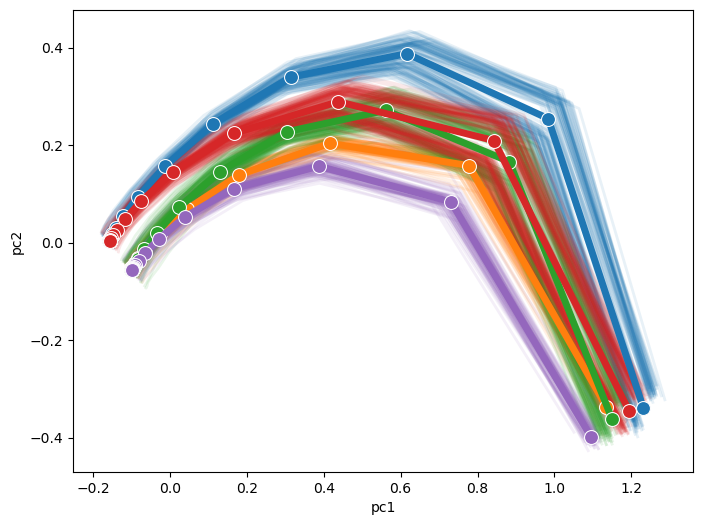

In [7]:
model.trajectory.calculate_kmean_cluster(n_cluster = 5)
model.trajectory.plot_trajectory_cluster(show_legend = False)

# Create logic function matrix
In this part of the script, we load models' logic function into a matrix. This matrix can then be transformed into a Disjunctive Normal Form (DNF) which allow us to identify clause of components that can activate each node. 

In [8]:
model.create_logic()
model.logic.model_logic

  0%|          | 0/617 [00:00<?, ?it/s]

100%|██████████| 617/617 [00:12<00:00, 48.58it/s]


Model logic loaded
Logic object created


bn168  \
Bclaf1                                                 (Myc)   
CDK46CycD                                     (Bclaf1 & Myc)   
CIPKIP                                                (Junb)   
Cebpa                     (Gata2 & !Ikzf1) | (!Ikzf1 & Spi1)   
Egr1                                          (Gata2 & Junb)   
Fli1                                (Junb) | (Gata1 & !Klf1)   
Gata1            (Fli1) | (Gata1 & !Ikzf1) | (Gata2 & !Spi1)   
Gata2      (Egr1 & !Gata1 & !Spi1) | (Egr1 & !Zfpm1) | (!...   
Ikzf1                                                (Gata2)   
Junb                                          (Egr1) | (Myc)   
Klf1                                         (!Fli1 & Gata1)   
Myc                                         (Bclaf1 & Cebpa)   
Spi1             (Cebpa & !Gata1 & !Gata2) | (!Gata1 & Spi1)   
Tal1                                         (Gata1 & !Spi1)   
Zfpm1                                                (Gata1)   

                                                       bn602  \
Bclaf1                                                 (Myc)   
CDK46CycD                                     (Bclaf1 & Myc)   
CIPKIP                                                (Junb)   
Cebpa                     (Gata2 & !Ikzf1) | (!Ikzf1 & Spi1)   
Egr1                                          (Gata2 & Junb)   
Fli1       (Gata1 & Junb) | (Gata1 & !Klf1) | (Junb & !Klf1)   
Gata1            (Fli1) | (Gata1 & !Ikzf1) | (Gata2 & !Spi1)   
Gata2      (Egr1 & !Gata1 & !Zfpm1) | (Egr1 & Gata2 & !Sp...   
Ikzf1                                                (Gata2)   
Junb                                          (Egr1) | (Myc)   
Klf1                                         (!Fli1 & Gata1)   
Myc                                         (Bclaf1 & Cebpa)   
Spi1             (Cebpa & !Gata1 & !Gata2) | (!Gata1 & Spi1)   
Tal1                                         (Gata1 & !Spi1)   
Zfpm1                                                (Gata1)   

                                                       bn157  \
Bclaf1                                                 (Myc)   
CDK46CycD                                     (Bclaf1 & Myc)   
CIPKIP                                                (Junb)   
Cebpa                     (Gata2 & !Ikzf1) | (!Ikzf1 & Spi1)   
Egr1                                          (Gata2 & Junb)   
Fli1       (Gata1 & Junb) | (Gata1 & !Klf1) | (Junb & !Klf1)   
Gata1            (Fli1) | (Gata1 & !Ikzf1) | (Gata2 & !Spi1)   
Gata2      (Egr1 & !Zfpm1) | (!Gata1 & Gata2 & !Spi1) | (...   
Ikzf1                                                (Gata2)   
Junb                                          (Egr1) | (Myc)   
Klf1                                         (!Fli1 & Gata1)   
Myc                                         (Bclaf1 & Cebpa)   
Spi1             (Cebpa & !Gata1 & !Gata2) | (!Gata1 & Spi1)   
Tal1                                         (Gata1 & !Spi1)   
Zfpm1                                                (Gata1)   

                                                        bn45  \
Bclaf1                                                 (Myc)   
CDK46CycD                                   (Bclaf1) | (Myc)   
CIPKIP                                                (Junb)   
Cebpa                     (Gata2 & !Ikzf1) | (!Ikzf1 & Spi1)   
Egr1                                          (Gata2 & Junb)   
Fli1                                (Junb) | (Gata1 & !Klf1)   
Gata1      (Fli1) | (Gata1 & !Ikzf1 & !Spi1) | (Gata2 & !...   
Gata2      (Egr1 & !Gata1 & !Spi1 & !Zfpm1) | (!Gata1 & G...   
Ikzf1                                                (Gata2)   
Junb                                          (Egr1) | (Myc)   
Klf1                                         (!Fli1 & Gata1)   
Myc                                         (Bclaf1 & Cebpa)   
Spi1             (Cebpa & !Gata1 & !Gata2) | (!Gata1 & Spi1)   
Tal1                                         (Gata1 & !Spi1)   
Zfpm1               

100%|██████████| 617/617 [00:25<00:00, 24.38it/s]
/home/spankaew/anaconda3/envs/network_analysis/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Flattend logic clause created


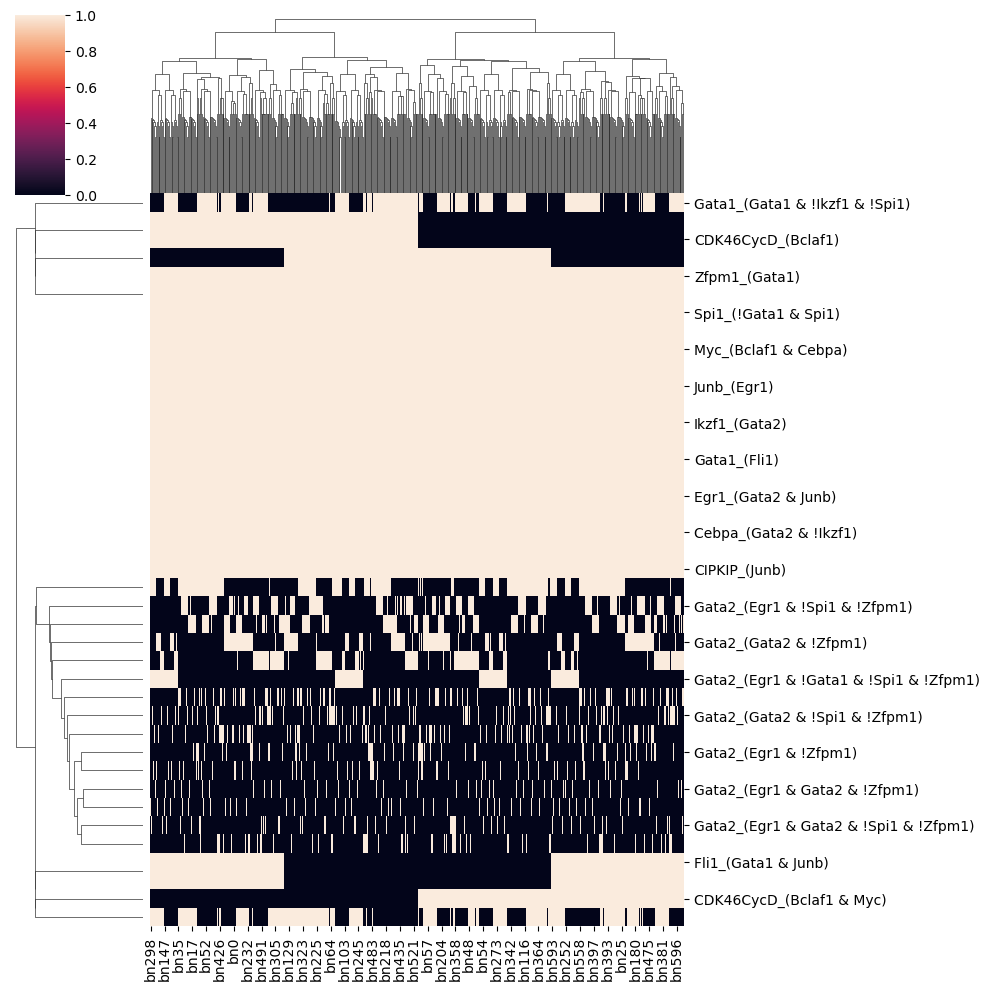

In [9]:
model.logic.create_flattend_logic_clause()

import seaborn as sns
sns.clustermap(model.logic.logic_clause_flattend)

PCA calculated


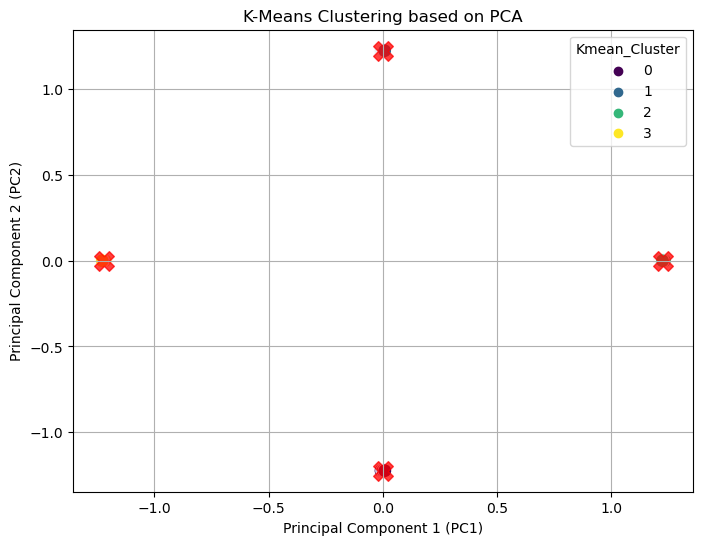

In [14]:
model.logic.calculate_logic_pca()
model.logic.calculate_kmean_cluster(num_cluster=4, plot = True)

# Test function : calculate the logical function variant for each clusters

In [20]:
from sklearn.preprocessing import OrdinalEncoder

In [23]:
model_cluster = pd.Series(model.trajectory.cluster_dict)
model_logic = model.logic.model_logic

var_logic_clust = pd.DataFrame()
for i in list(model_cluster.unique()):
    model_logic_sub = model_logic.transpose().loc[list(model_cluster.index[model_cluster == i])]
    #model_logic_sub = model_logic_sub.drop(['logic_cluster'], axis = 1)
    var_logic_length = []
    for j in model_logic_sub.columns:
        num_logic = model_logic_sub[j].value_counts().size
        var_logic_length.append(num_logic)
    var_logic_length = pd.DataFrame(var_logic_length, columns = ['logic_length'], index = model_logic_sub.columns)
    var_logic_clust = pd.concat([var_logic_clust, var_logic_length], axis = 1, ignore_index = False)
var_logic_clust.columns = list(model_cluster.unique())

model_logic_t= model_logic.transpose()

# Ordinal encoding
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(model_logic_t)
encoded_df = pd.DataFrame(encoded_data, columns=model_logic_t.columns)

sort_index = encoded_df.max().sort_values().index

var_logic_clust= var_logic_clust.loc[sort_index] 

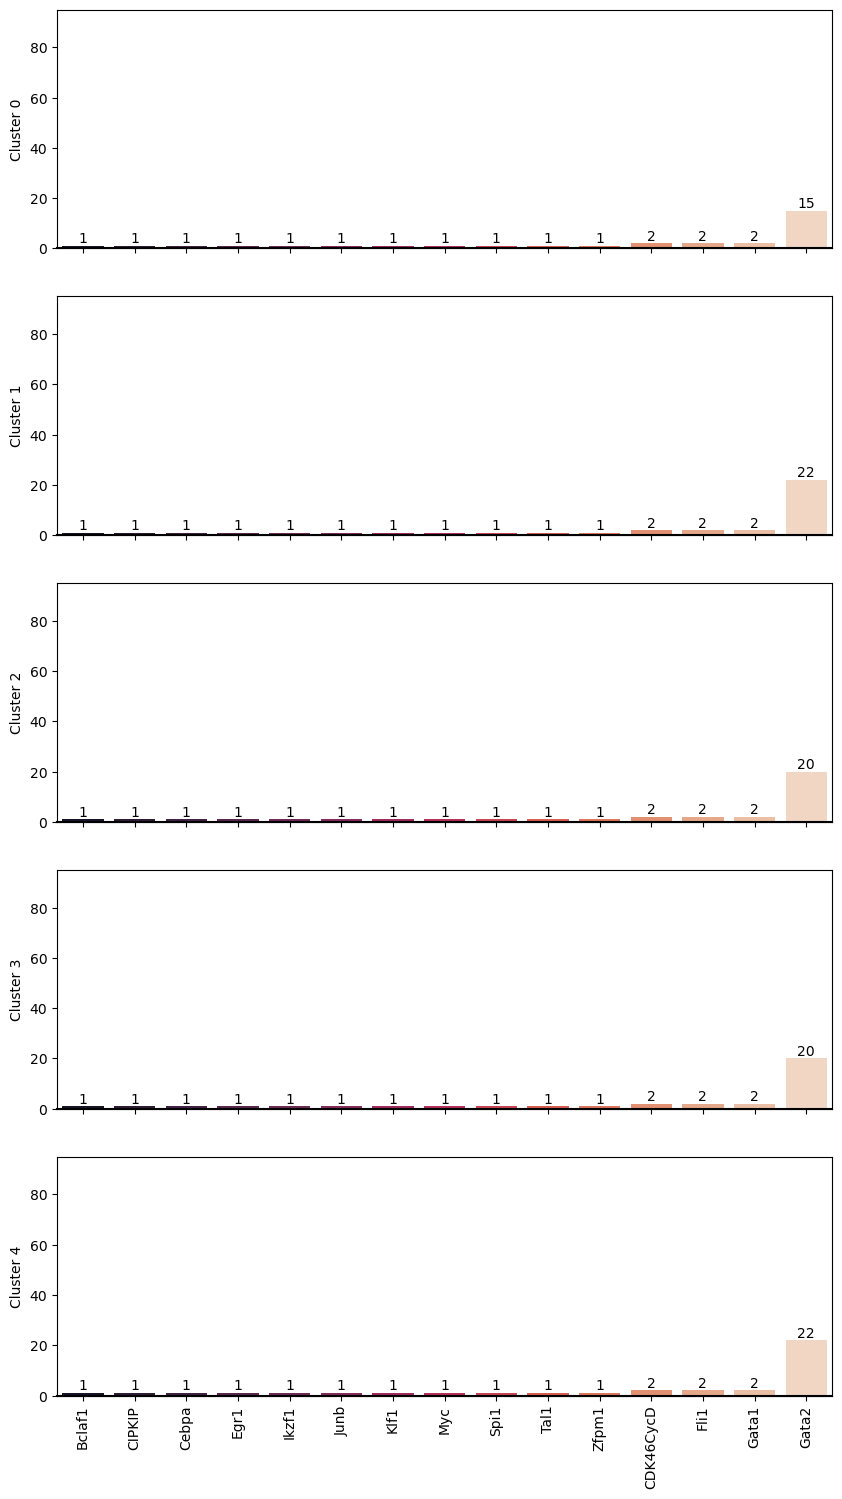

In [26]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(5, 1, figsize=(10, 18), sharex=True)
plt.ylim(0, 65)

for i in range(5):
    sns.barplot(x=var_logic_clust.index, y=var_logic_clust[i], palette="rocket", ax=axes[i])
    axes[i].axhline(0, color="k", clip_on=False)
    axes[i].set_ylabel(f"Cluster {i}")
    axes[i].bar_label(axes[i].containers[0], fontsize=10)
    axes[i].set_ylim(0, 95)

plt.xticks(rotation=90)
plt.show()

# Test function compare logic function between two clusters

In [32]:
cluster0 = model_cluster.index[model_cluster == 0]
cluster1 = model_cluster.index[model_cluster == 1]
test = model.logic.logic_clause_flattend.copy()


,bn100,bn104,bn11,bn110,bn118,bn121,bn123,bn126,bn128,bn134,bn144,bn147,bn148,bn15,bn151,bn152,bn156,bn159,bn169,bn171,bn178,bn179,bn182,bn195,bn205,bn217,bn218,bn219,bn231,bn248,bn257,bn260,bn265,bn269,bn271,bn272,bn275,bn284,bn294,bn297,bn298,bn299,bn303,bn32,bn320,bn321,bn322,bn327,bn348,bn349,bn354,bn362,bn373,bn375,bn385,bn388,bn398,bn399,bn413,bn422,bn423,bn457,bn466,bn471,bn479,bn481,bn483,bn49,bn492,bn501,bn505,bn510,bn513,bn514,bn515,bn53,bn549,bn559,bn569,bn575,bn579,bn59,bn590,bn595,bn603,bn7,bn75,bn78,bn87,bn96,herault_hematopoiesis
Bclaf1_(Myc),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
CDK46CycD_(Bclaf1 & Myc),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CIPKIP_(Junb),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Cebpa_(Gata2 & !Ikzf1),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Cebpa_(!Ikzf1 & Spi1),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Egr1_(Gata2 & Junb),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Fli1_(Junb),1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
Fli1_(Gata1 & !Klf1),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Gata1_(Fli1),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Gata1_(Gat

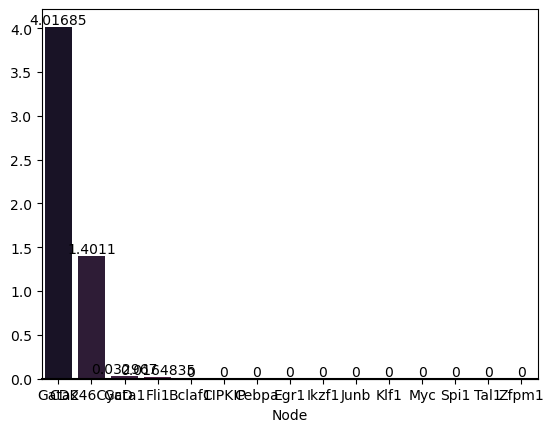

In [36]:
test = model.logic.logic_clause_flattend.copy()
test_dif = test[cluster0].mean(axis = 1) - test[cluster1].mean(axis=1)

# Split the index into two parts
split_index = test_dif.index.str.split('_', expand=True)
split_df = split_index.to_frame(index=False)
split_df['value'] = test_dif.values

# Pivot the DataFrame to create the matrix
matrix = split_df.pivot(index=0, columns= 1, values='value')

# Display the matrix
plot_value = matrix.abs().sum(axis = 1).sort_values(ascending = True)


plot = sns.barplot(x=plot_value.index, y=plot_value.values, palette="rocket")
plot.axhline(0, color="k", clip_on=False)
plot.set_xlabel("Node")
plot.bar_label(plot.containers[0], fontsize=10)
plt.show()

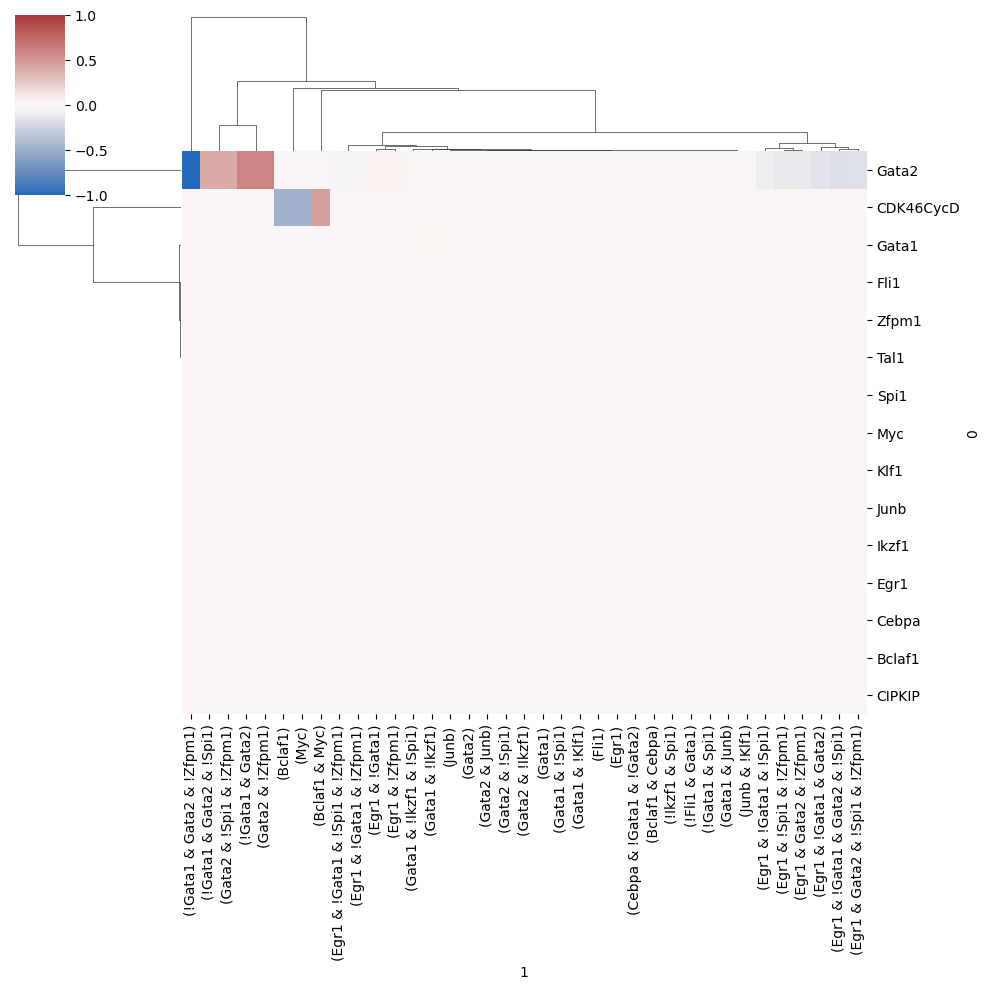

In [41]:
sns.clustermap(matrix.fillna(0), cmap = 'vlag', vmax = 1, vmin = -1)